In [1]:
library(locfit)
library(RcppCNPy)
library(reticulate)
np <- import('numpy')

locfit 1.5-9.1 	 2013-03-22


In [2]:
alphas <- c(0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.6,0.7,0.8,0.9)
x <- seq(1,10,0.2)
y0 <- x*x

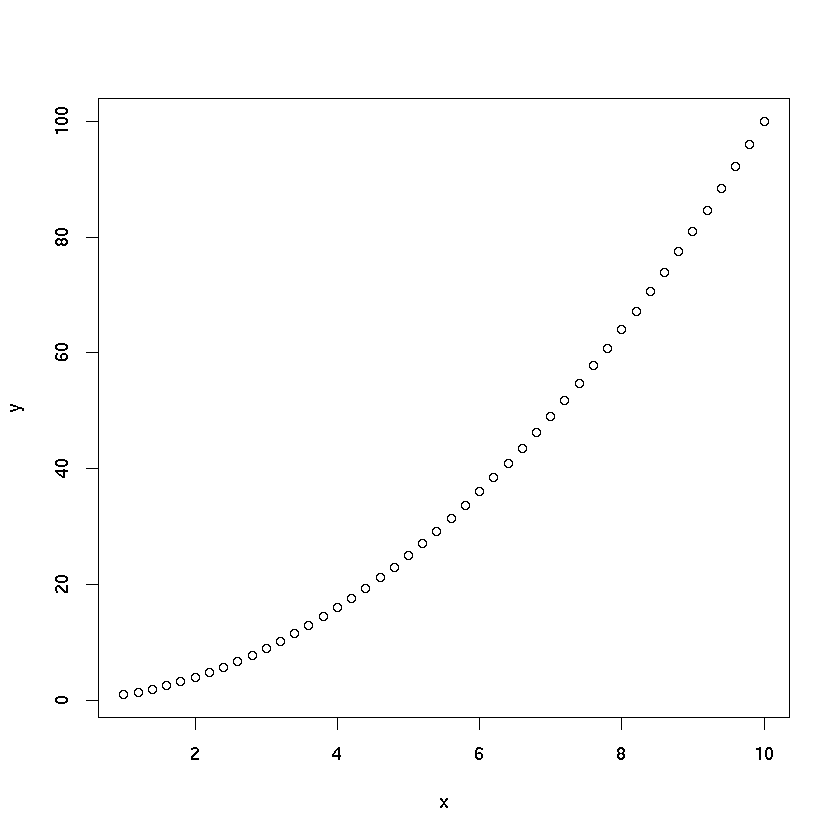

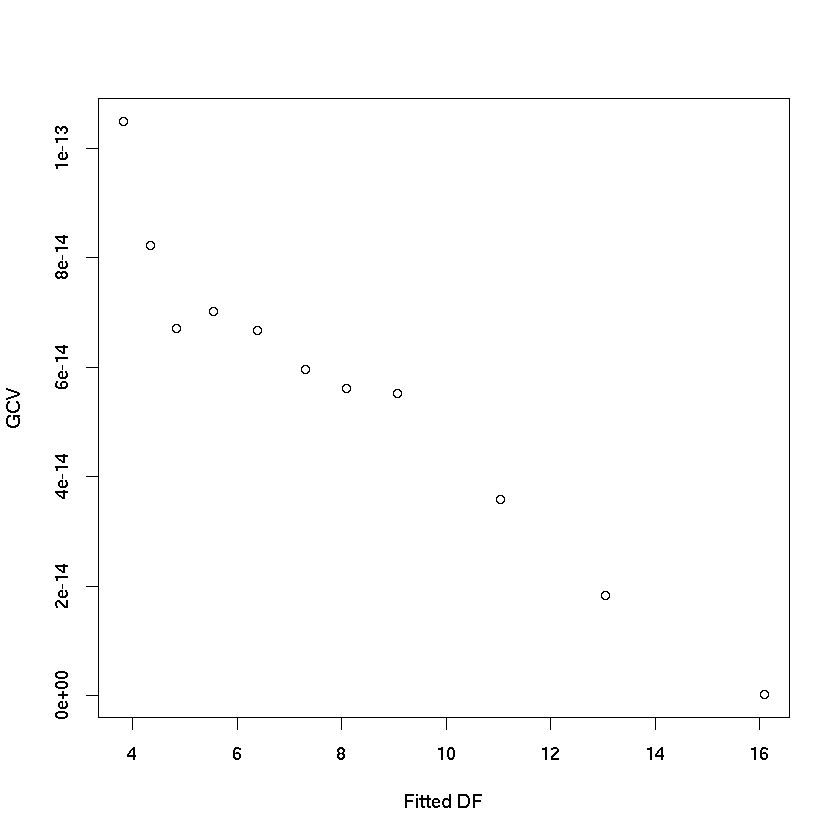

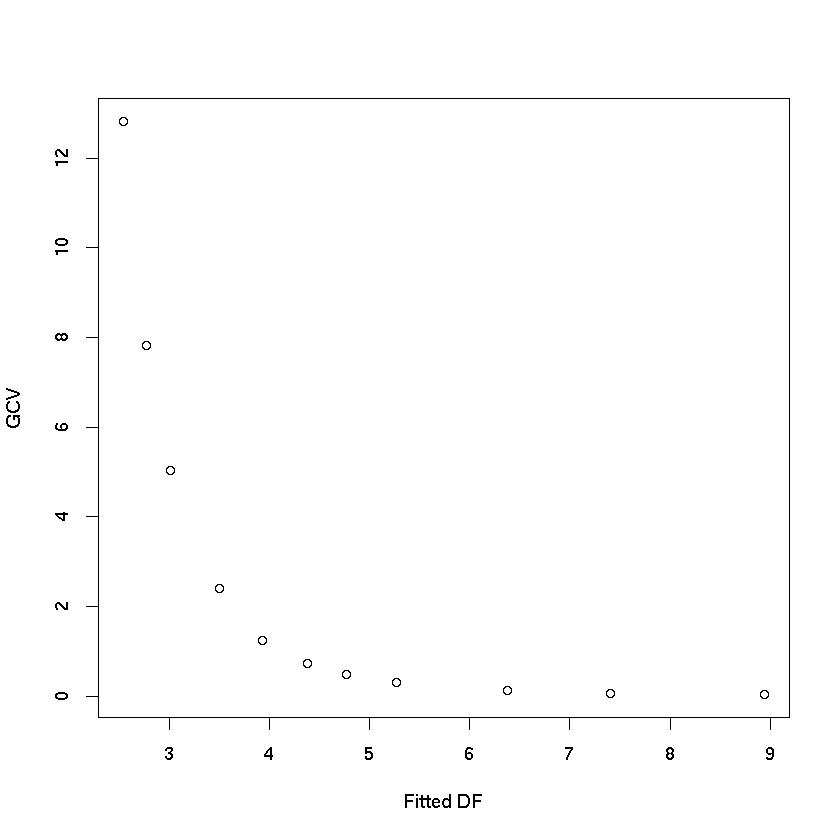

In [3]:
y <- y0
plot(x,y)
gcvplot(y~x,kern='epan',alpha=alphas)
gcvplot(y~x,kern='epan',deg=1,alpha=alphas)

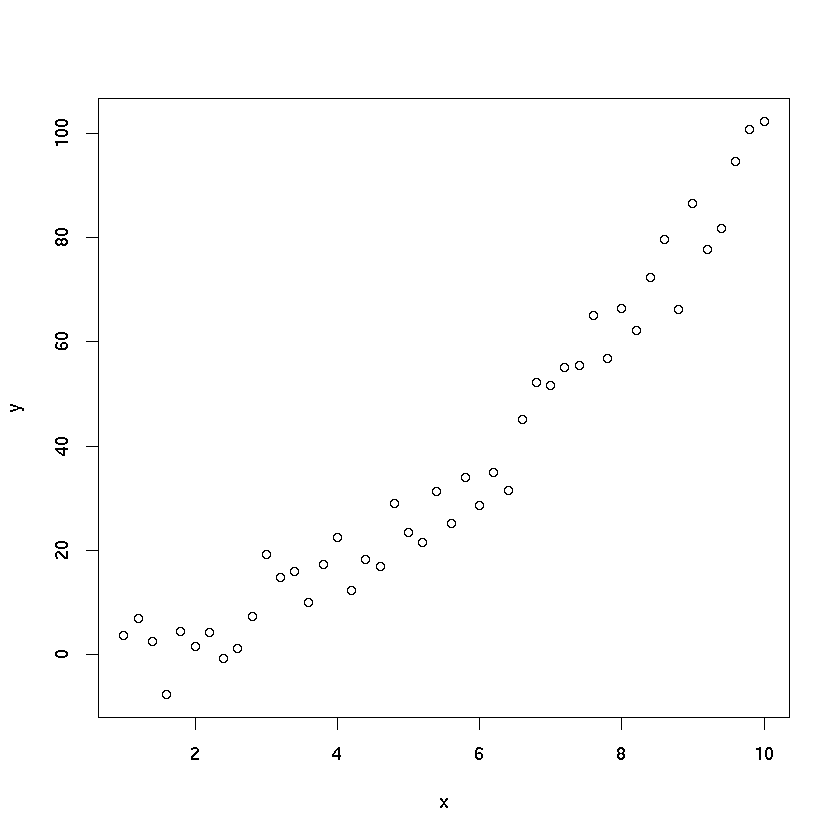

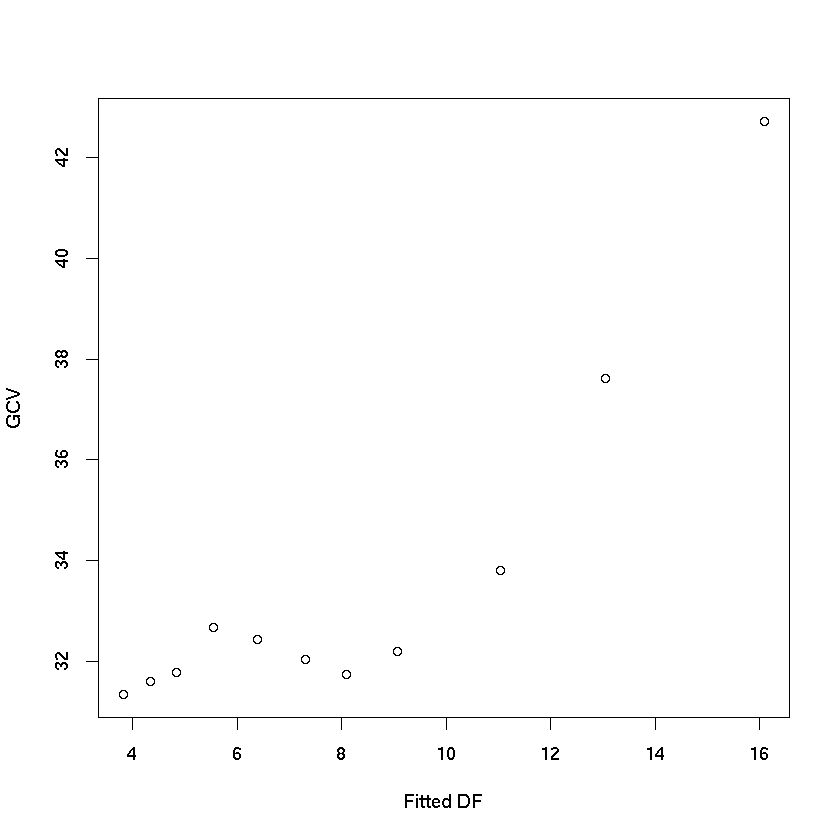

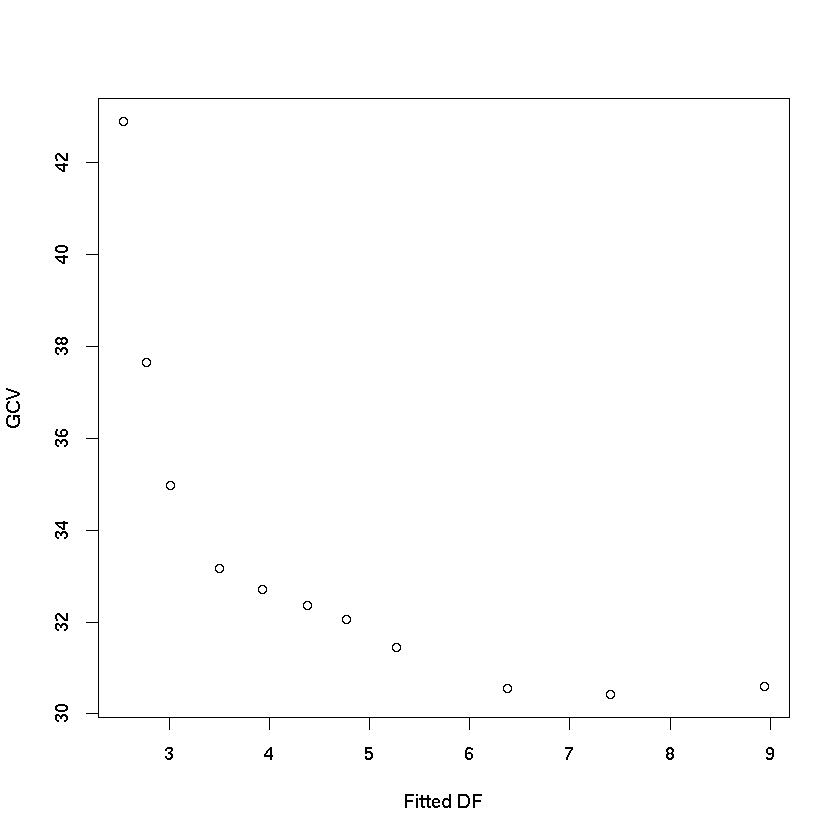

In [4]:
y <- y0+rnorm(length(y0))*5
plot(x,y)
gcvplot(y~x,kern='epan',alpha=alphas)
gcvplot(y~x,kern='epan',deg=1,alpha=alphas)

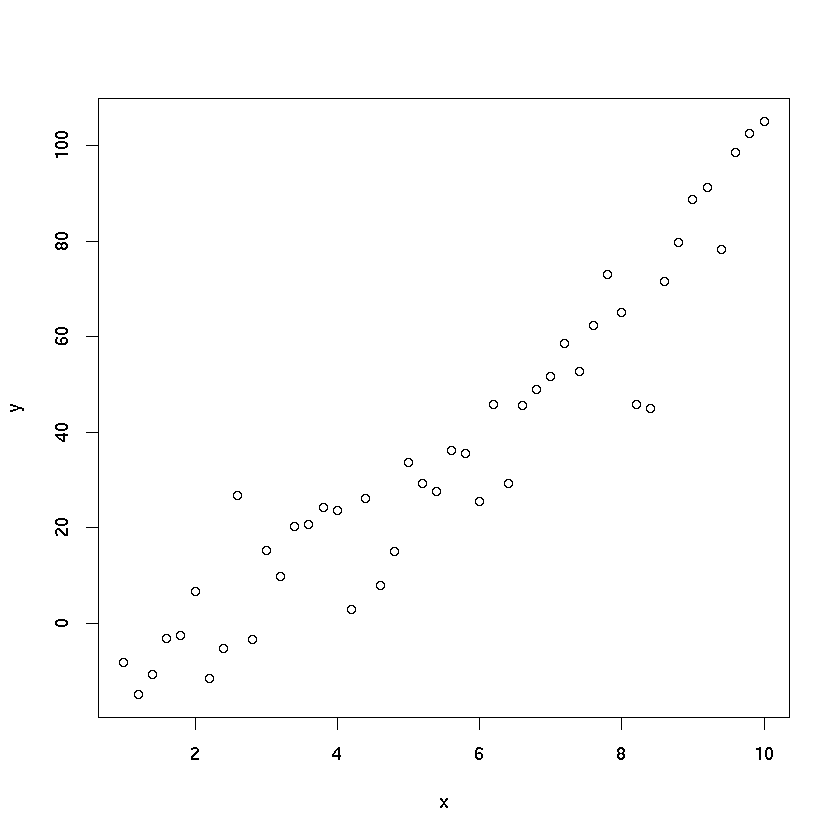

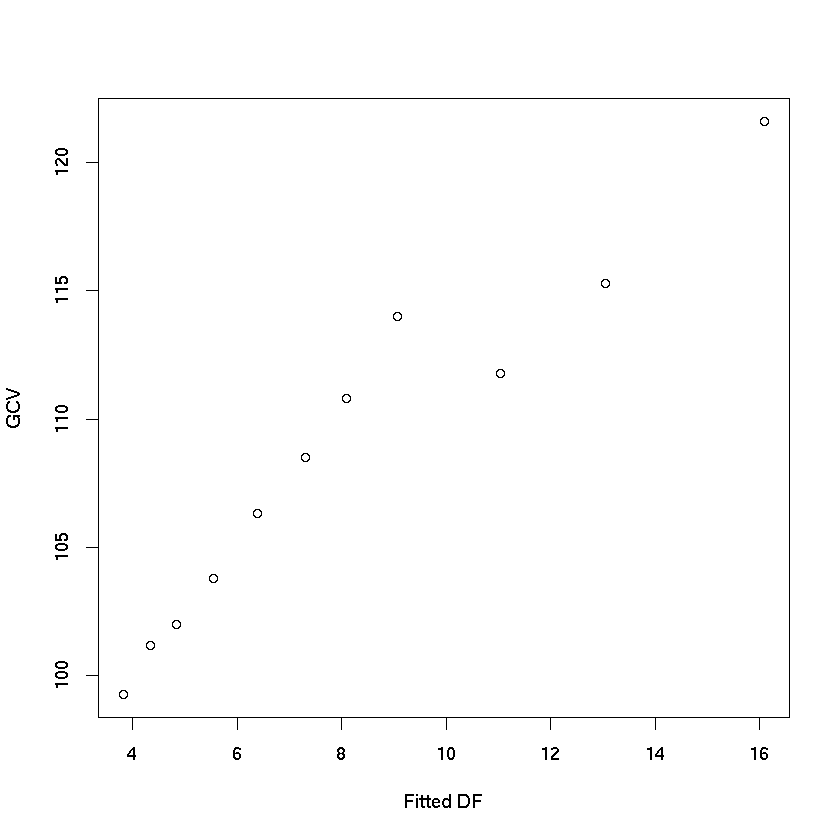

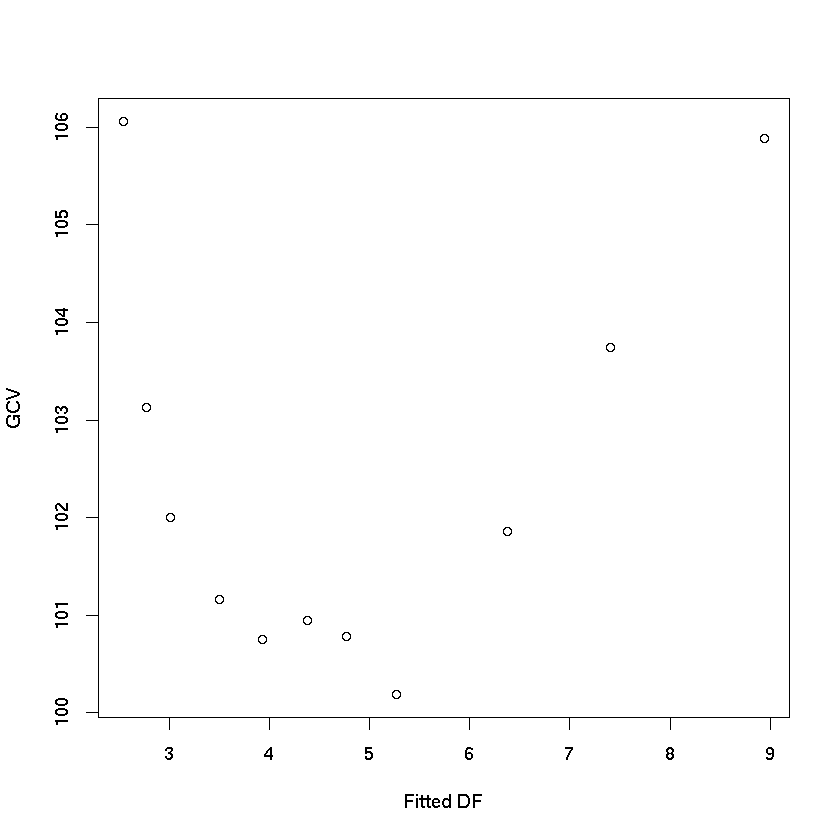

In [5]:
y <- y0+rnorm(length(y0))*10
plot(x,y)
gcvplot(y~x,kern='epan',alpha=alphas)
gcvplot(y~x,kern='epan',deg=1,alpha=alphas)

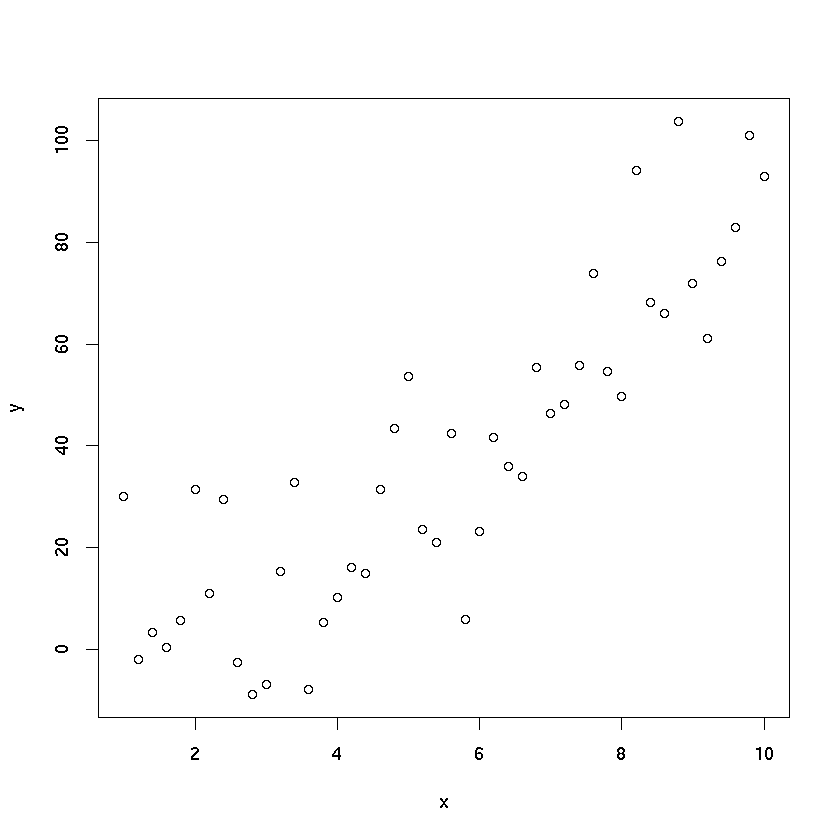

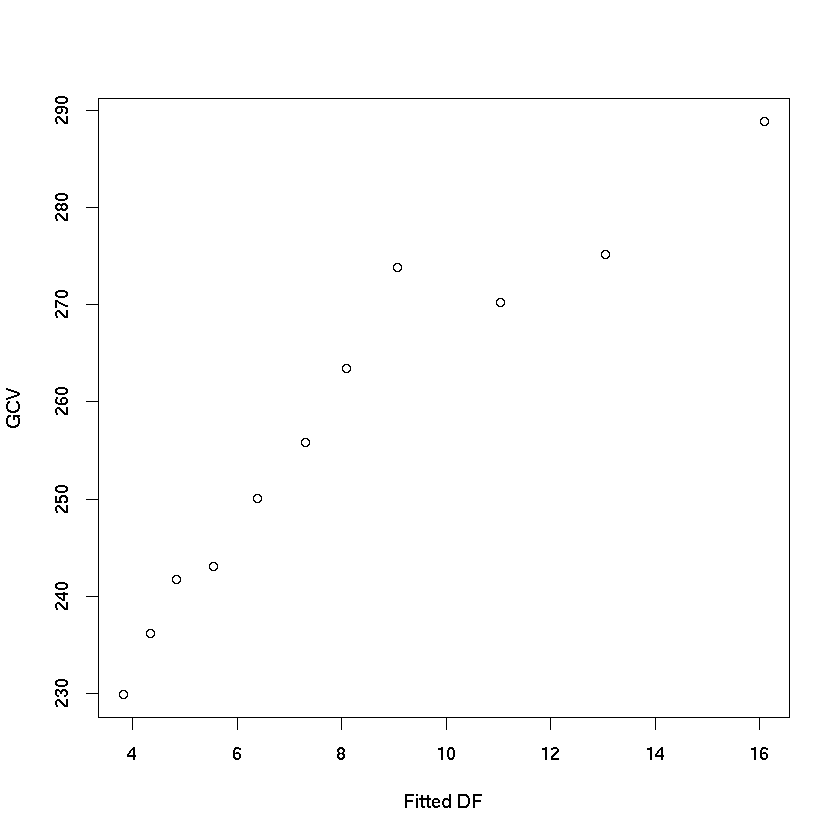

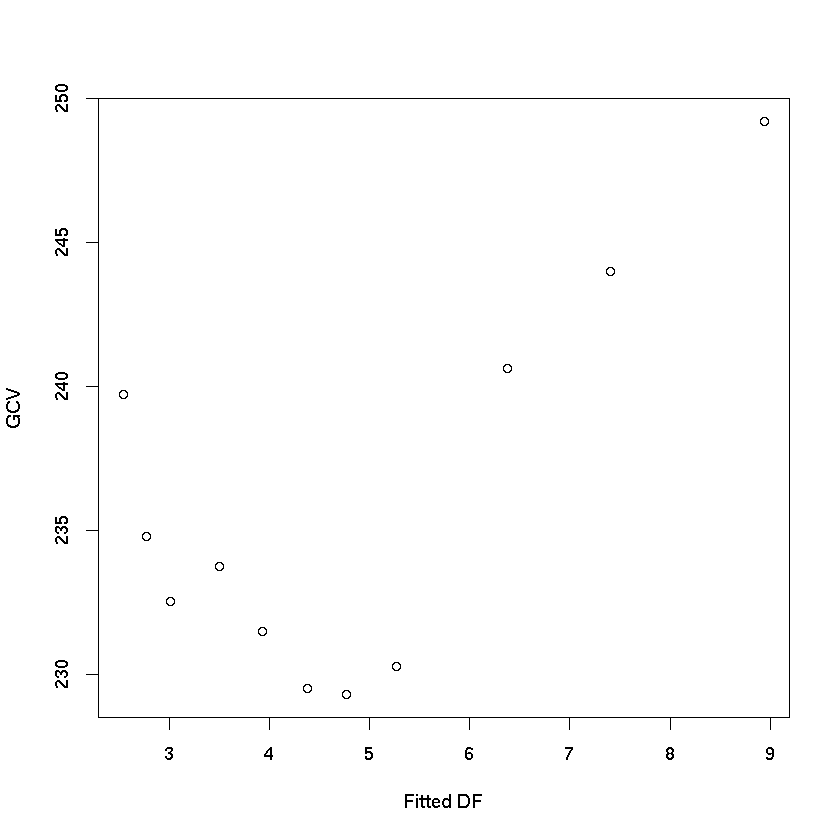

In [6]:
y <- y0+rnorm(length(y0))*15
plot(x,y)
gcvplot(y~x,kern='epan',alpha=alphas)
gcvplot(y~x,kern='epan',deg=1,alpha=alphas)

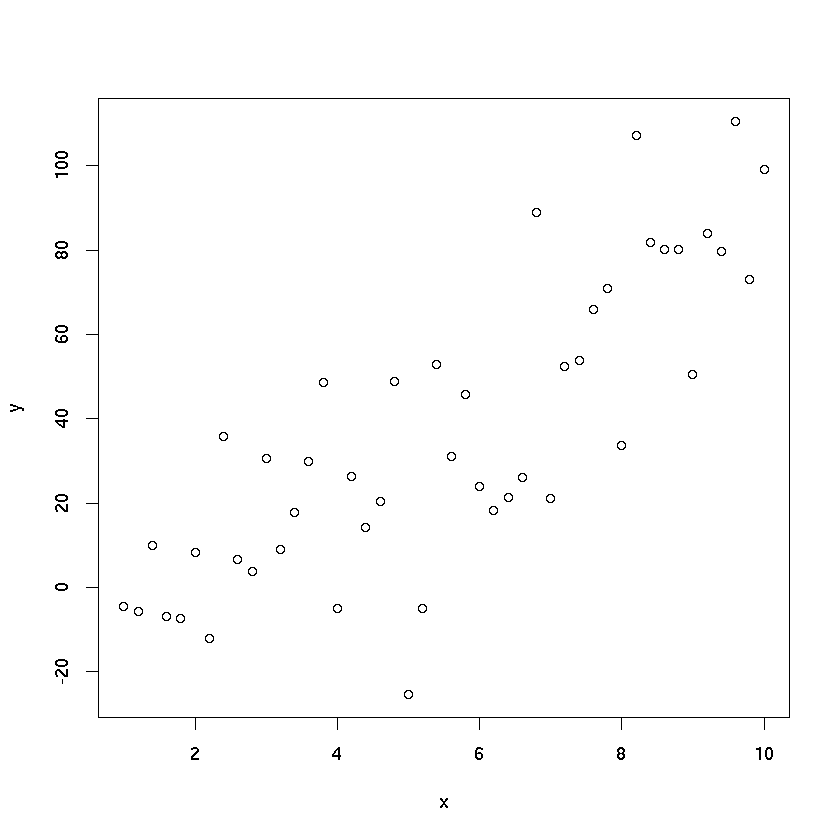

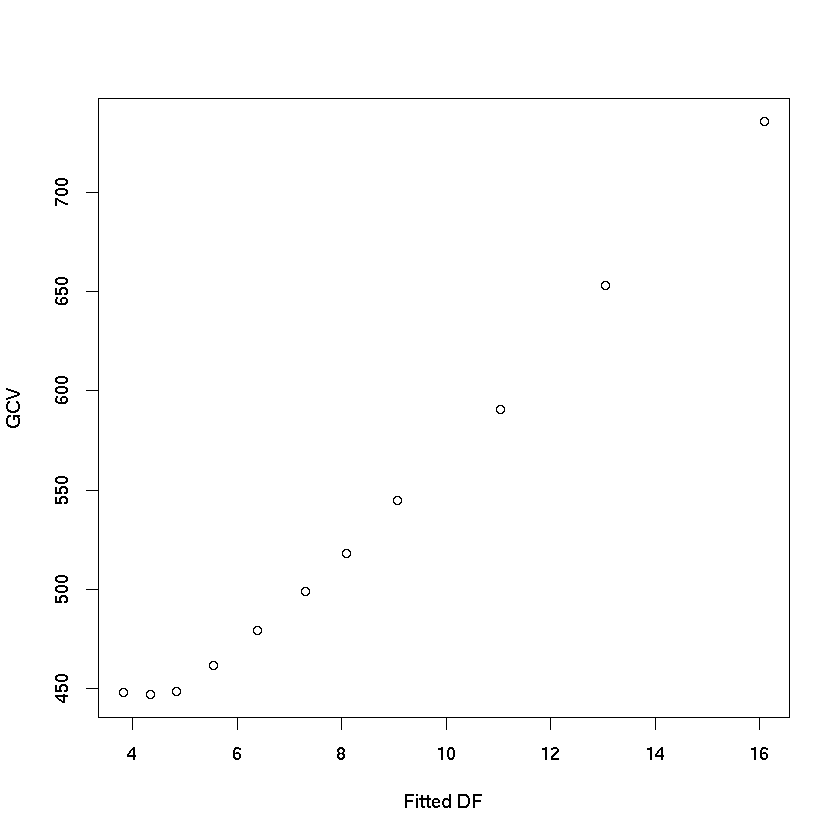

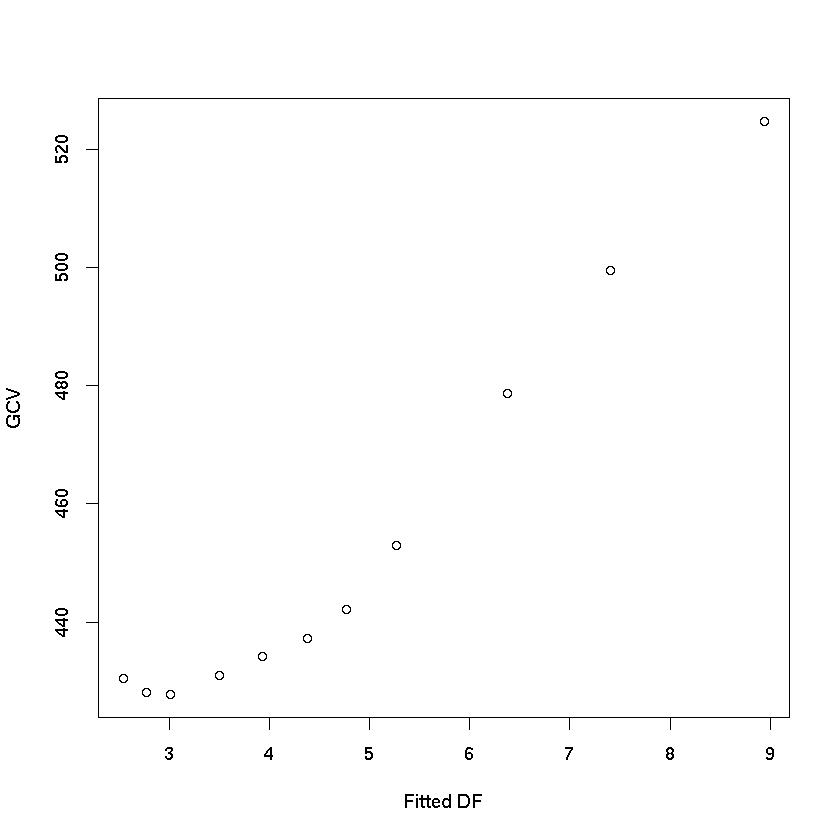

In [7]:
y <- y0+rnorm(length(y0))*20
plot(x,y)
gcvplot(y~x,kern='epan',alpha=alphas)
gcvplot(y~x,kern='epan',deg=1,alpha=alphas)

In [7]:
gcv(y~x,kern='epan',alpha=0.9)

lik          infl          vari           gcv 
-6.520113e-16  3.917556e+00  3.684397e+00  3.524755e-16

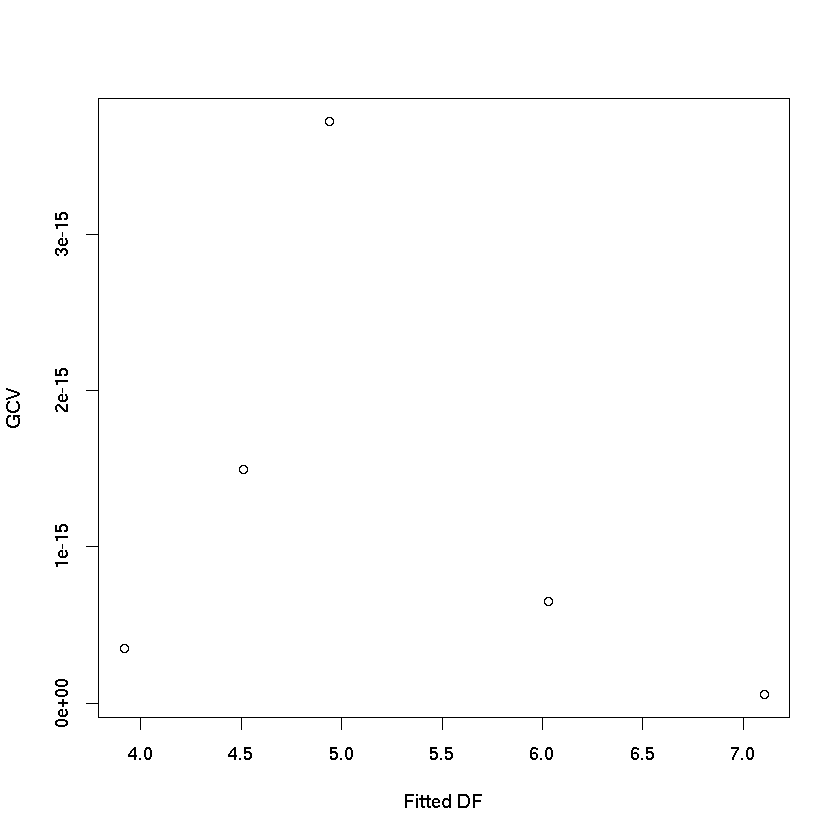

In [8]:
gcvplot(y~x,kern='epan',alpha=c(0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9))

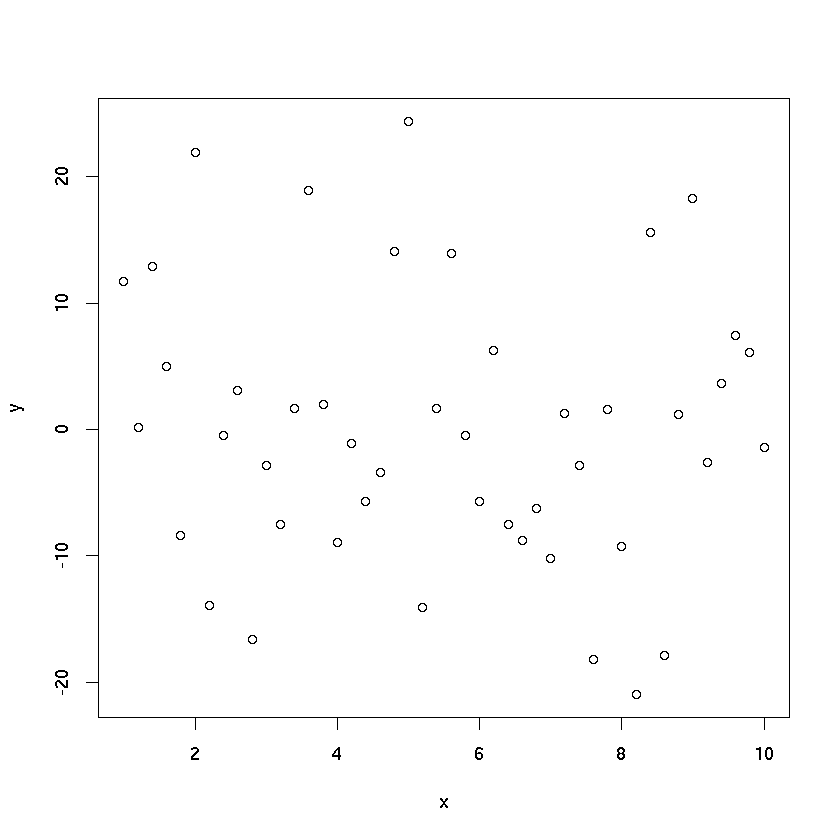

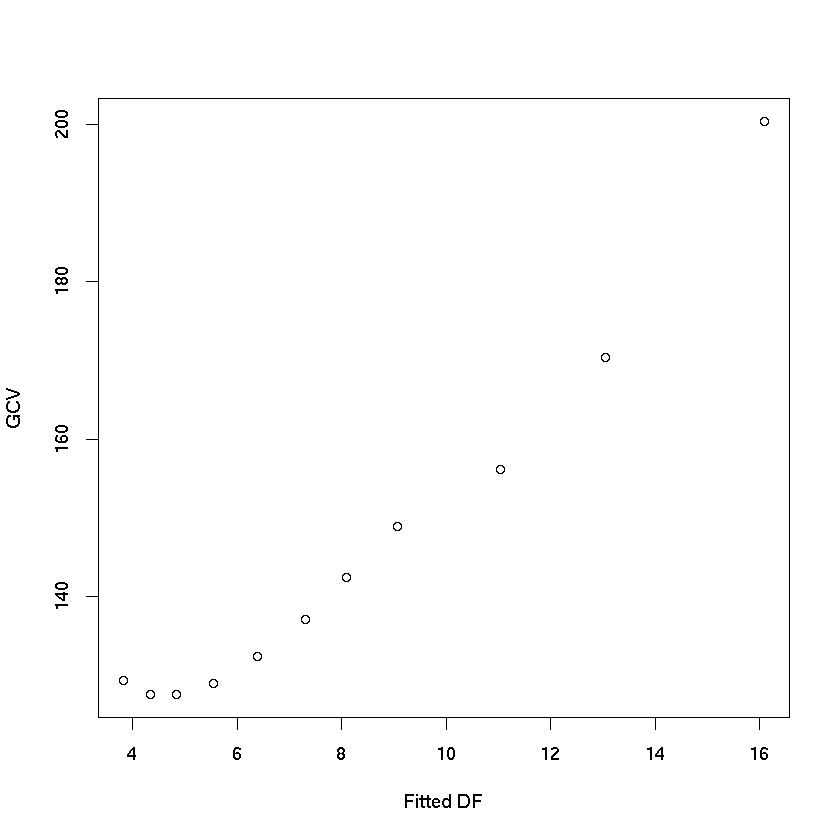

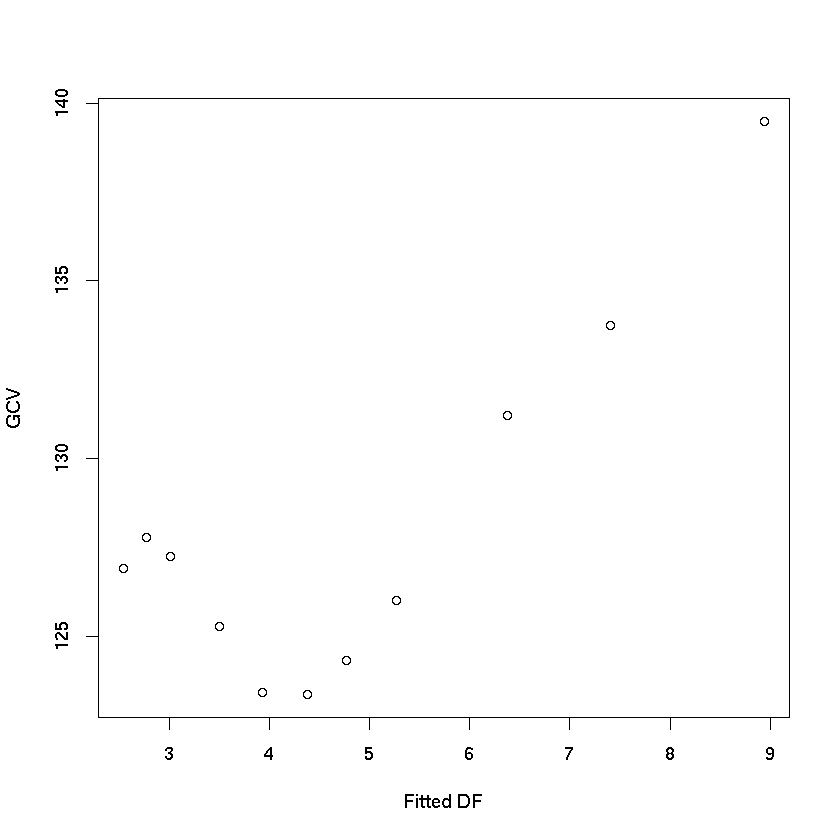

In [10]:
y <- rnorm(length(y0))*10
plot(x,y)
gcvplot(y~x,kern='epan',alpha=alphas)
gcvplot(y~x,kern='epan',deg=1,alpha=alphas)

In [2]:
p0 = c(1.14385, 13.28584, 0.34846, 11.30750, 11.97186, 0., 0.)

In [3]:
##ngal(1)+wp(19)+ggl(20)+vpf(20)+Pcic(40)

In [4]:
seedlist <- c(236,483,518,563,831)

In [5]:
data <- c(np$load('Run_062718/bolp_20p0_um0_b_236.npz'),
         np$load('Run_062718/bolp_20p0_um0_b_483.npz'),
         np$load('Run_062718/bolp_20p0_um0_b_518.npz'),
         np$load('Run_062718/bolp_20p0_um0_b_563.npz'),
         np$load('Run_062718/bolp_20p0_um0_b_831.npz'))

In [6]:
setwd('~/Assembly Bias Project/Fisher analysis/Run_062718/')

### GCV for alpha

In [7]:
alphas <- seq(0.1,0.9,0.05)

In [8]:
calc_gcv_score <- function(i, j){
    x <- data[[i]]$f[['param']][(500*j-499):(500*j),j]
    gcv_score <- matrix(0,ncol=17,nrow=100)
    for (k in seq(100)){
        y <- data[[i]]$f[['func_all']][(500*j-499):(500*j),k]
        for (l in seq(17)){
            gcv_score[k,l] <- as.numeric(gcv(y~x,kern='tria',alpha=alphas[l]))[4]
        }
    }
    gcv_score
}

In [9]:
for (i in seq(5)){
    np$savez(sprintf('gcv_bolp_20p0_um0_%i.npz',seedlist[i]),gcv_alpha=calc_gcv_score(i,1),
            gcv_logM1=calc_gcv_score(i,2),gcv_sigmalogM=calc_gcv_score(i,3),gcv_logM0=calc_gcv_score(i,4),
            gcv_logMmin=calc_gcv_score(i,5),gcv_Acen=calc_gcv_score(i,6),gcv_Asat=calc_gcv_score(i,7))
}

### locfit with alpha=0.3,0.5,0.7

In [19]:
setwd('~/Assembly Bias Project/Fisher analysis/Run_062718/bolp_20p0_um0_locfit_test_alpha')

In [12]:
find_dfdp_test <- function(data, num, alpha10, plot=0){
    dfdp = matrix(0,nrow=7,ncol=100)
    for (i in seq(7)){
        x <- data$f[['param']][(500*i-499):(500*i),i]
        p <- p0[i]
        for (j in seq(100)){
            y <- data$f[['func_all']][(500*i-499):(500*i),j]
            fit <- locfit(y~x,deriv=1,alpha=alpha10/10.,kern='tria')
            fit_orig <- locfit(y~x,alpha=alpha10/10.,kern='tria')
            f <- as.numeric(preplot(fit_orig,p)[2])
            fp <- as.numeric(preplot(fit,p)[2])
            dfdp[i,j] <- fp
            if (plot==1){
                png(filename=sprintf('run%i_p%if%i_a%i.png',num,(i-1),(j-1),alpha10))
                plot(x, y)
                lines(fit_orig,col='blue')
                abline(v=p,lty=2)
                abline(a=-p*fp+f,b=fp,col='red')
                dev.off()
            }
        }
    }
    dfdp
}

In [16]:
dfdp_236_3 = find_dfdp_test(data[[1]],seedlist[1],alpha10=3,plot=1)
#dfdp_483_3 = find_dfdp_test(data[[2]],seedlist[2],alpha10=3,plot=1)
#dfdp_518_3 = find_dfdp_test(data[[3]],seedlist[3],alpha10=3,plot=1)
#dfdp_563_3 = find_dfdp_test(data[[4]],seedlist[4],alpha10=3,plot=1)
#dfdp_831_3 = find_dfdp_test(data[[5]],seedlist[5],alpha10=3,plot=1)

In [17]:
dfdp_236_5 = find_dfdp_test(data[[1]],seedlist[1],alpha10=5,plot=1)
#dfdp_483_5 = find_dfdp_test(data[[2]],seedlist[2],alpha10=5,plot=1)
#dfdp_518_5 = find_dfdp_test(data[[3]],seedlist[3],alpha10=5,plot=1)
#dfdp_563_5 = find_dfdp_test(data[[4]],seedlist[4],alpha10=5,plot=1)
#dfdp_831_5 = find_dfdp_test(data[[5]],seedlist[5],alpha10=5,plot=1)

In [18]:
dfdp_236_7 = find_dfdp_test(data[[1]],seedlist[1],alpha10=7,plot=1)
#dfdp_483_7 = find_dfdp_test(data[[2]],seedlist[2],alpha10=7,plot=1)
#dfdp_518_7 = find_dfdp_test(data[[3]],seedlist[3],alpha10=7,plot=1)
#dfdp_563_7 = find_dfdp_test(data[[4]],seedlist[4],alpha10=7,plot=1)
#dfdp_831_7 = find_dfdp_test(data[[5]],seedlist[5],alpha10=7,plot=1)

### Use 0.7(default) for now.

In [20]:
setwd('~/Assembly Bias Project/Fisher analysis/Run_062718/bolp_20p0_um0_locfit_tcub_alpha07/')

In [21]:
find_dfdp <- function(data, num, plot=0){
    dfdp = matrix(0,nrow=7,ncol=100)
    for (i in seq(7)){
        x <- data$f[['param']][(500*i-499):(500*i),i]
        p <- p0[i]
        for (j in seq(100)){
            y <- data$f[['func_all']][(500*i-499):(500*i),j]
            fit <- locfit(y~x,deriv=1)
            fit_orig <- locfit(y~x)
            f <- as.numeric(preplot(fit_orig,p)[2])
            fp <- as.numeric(preplot(fit,p)[2])
            dfdp[i,j] <- fp
            if (plot==1){
                png(filename=sprintf('run%i_p%if%i.png',num,(i-1),(j-1)))
                plot(x, y)
                lines(fit_orig,col='blue')
                abline(v=p,lty=2)
                abline(a=-p*fp+f,b=fp,col='red')
                dev.off()
            }
        }
    }
    dfdp
}

In [22]:
dfdp_236 = find_dfdp(data[[1]],seedlist[1],plot=1)
dfdp_483 = find_dfdp(data[[2]],seedlist[2],plot=1)
dfdp_518 = find_dfdp(data[[3]],seedlist[3],plot=1)
dfdp_563 = find_dfdp(data[[4]],seedlist[4],plot=1)
dfdp_831 = find_dfdp(data[[5]],seedlist[5],plot=1)

In [23]:
setwd('~/Assembly Bias Project/Fisher analysis/Run_062718/')

In [24]:
np$savez('dfdp_bolp_20p0_um0_tcub_alpha07.npz',dfdp_236=dfdp_236,dfdp_483=dfdp_483,dfdp_518=dfdp_518,
         dfdp_563=dfdp_563,dfdp_831=dfdp_831)